<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Метод-взвешивание-классов" data-toc-modified-id="Метод-взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Метод взвешивание классов</a></span></li><li><span><a href="#Метод-увеличения-выборки" data-toc-modified-id="Метод-увеличения-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метод увеличения выборки</a></span></li><li><span><a href="#Метод-уменьшение-выборки" data-toc-modified-id="Метод-уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Метод уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Признаки

RowNumber — индекс строки в данных  
CustomerId — уникальный идентификатор клиента  
Surname — фамилия  
CreditScore — кредитный рейтинг  
Geography — страна проживания  
Gender — пол  
Age — возраст  
Tenure — сколько лет человек является клиентом банка  
Balance — баланс на счёте  
NumOfProducts — количество продуктов банка, используемых клиентом  
HasCrCard — наличие кредитной карты  
IsActiveMember — активность клиента  
EstimatedSalary — предполагаемая зарплата

# Целевой признак

Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,recall_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle



In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.columns = df.columns.str.lower()
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Численные признаки ['creditScore','age','tenure','balance','numofproducts','estimatedsalary'],необходимо масштабировать,на всем датасете.

Категориальные признаки ['geography','gender','hascrcard','sactivemember'],первые два необходимо преобразовать в численные,с помощью техники прямого кодирования One-Hot Encoding.

Следующим этапом следует удалить ['rownumber','customerid','surname','geography','gender'].

In [3]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски присутствуют только в столбце "tenure",можно заменить медианой,или удалить.

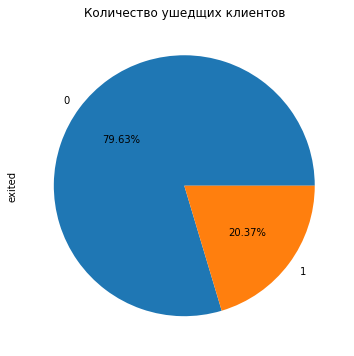

Количество действующих клиентов 7963
Количество ушедших клиентов 2037


In [5]:
df['exited'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(12,6), title="Количество ушедщих клиентов")
plt.show()
print('Количество действующих клиентов',len(df[df['exited']==0]))
print('Количество ушедших клиентов',len(df[df['exited']==1]))

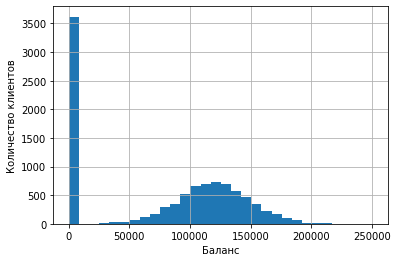

In [6]:
df['balance'].hist(bins=30);
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.show()


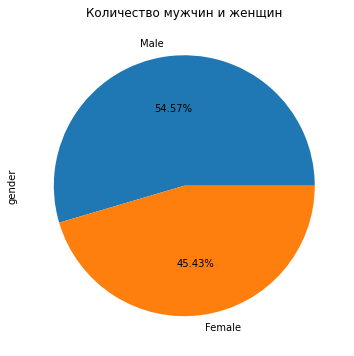

In [7]:
df['gender'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(12,6), title="Количество мужчин и женщин")
plt.show()

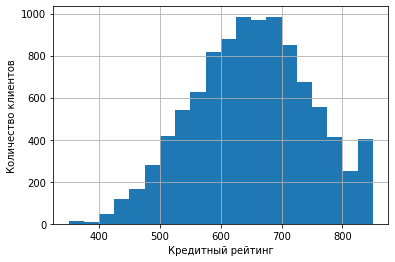

In [8]:
df['creditscore'].hist(bins=20);
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Количество клиентов')
plt.show()

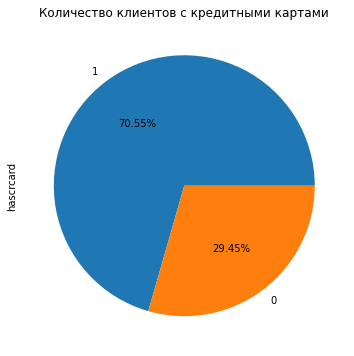

In [9]:
df['hascrcard'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(12,6), title="Количество клиентов с кредитными картами")
plt.show()

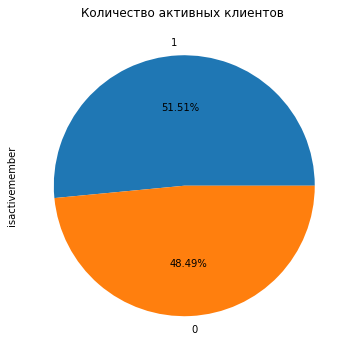

In [10]:
df['isactivemember'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(12,6), title="Количество активных клиентов ")
plt.show()

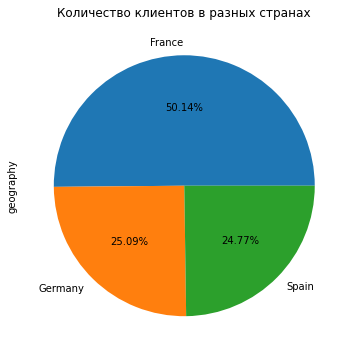

In [11]:

df['geography'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(12,6), title="Количество клиентов в разных странах")
plt.show()


In [12]:
df = df.dropna()

In [13]:
df.duplicated().sum()

0

In [14]:
df = pd.get_dummies(df,columns =['geography','gender'],drop_first =True)
df


,rownumber,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,9996,15606229,Obijiaku,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


In [15]:
df =df.drop(['surname','rownumber','customerid'],1)

In [16]:
df

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


In [17]:
features = df.drop('exited',axis=1)
target = df['exited']

In [18]:
features_train,features_valid_test,target_train,target_valid_test = train_test_split(features,target,test_size=0.4,random_state=12345)
features_valid,features_test,target_valid,target_test = train_test_split(features_valid_test,target_valid_test,test_size=0.5,random_state=12345)

In [19]:
features_train.shape

(5454, 11)

In [20]:
features_valid.shape


(1818, 11)

In [21]:
features_test.shape

(1819, 11)

In [ ]:
scaler = StandardScaler()
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
scaler.fit(features_train[numeric])
    
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [23]:
features_train

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0,0,0
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0,0,1
7462,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848738,0,0,1
1508,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,0,0,1
4478,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4938,1.283988,-0.474624,1.730036,0.813031,-0.908179,0,0,-1.092767,1,0,1
4529,0.158652,0.466548,1.041028,1.071609,-0.908179,1,1,0.260842,0,0,0
3866,-1.049276,-0.945210,0.352020,0.449165,-0.908179,1,1,-1.086965,0,0,0
2414,-0.956359,1.219485,1.385532,-1.237830,-0.908179,1,0,1.288527,0,0,0


## Исследование задачи

### Дерево решений

Accuracy лучшей модели на тренировочной выборке: 0.8755042170883756
Accuracy лучшей модели на валидационной выборке: 0.8586358635863587
Лучшая модель: DecisionTreeClassifier(max_depth=6, random_state=12345)


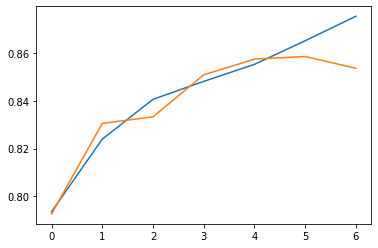

In [24]:
result_train_list = []
result_valid_list = []
best_result = 0
best_model = None
for depth in range(1,8):
    model = DecisionTreeClassifier(max_depth = depth,random_state = 12345)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    predictions_train = model.predict(features_train)
    result = accuracy_score(predictions_valid,target_valid)
    result_train = accuracy_score(predictions_train,target_train)
    result_train_list.append(result_train)
    result_valid_list.append(result)
    if result > best_result:
        best_model = model
        best_result = result
        
print('Accuracy лучшей модели на тренировочной выборке:',result_train)  
print('Accuracy лучшей модели на валидационной выборке:',best_result)   
print('Лучшая модель:',best_model)
plt.plot(result_train_list);
plt.plot(result_valid_list);

In [25]:
best_f1 = 0
best_result = 0
best_model = None
for depth in range(1,15):
    model = DecisionTreeClassifier(max_depth = depth,random_state = 12345)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    predictions_train = model.predict(features_train)
    f1_valid = f1_score(target_valid, predictions_valid)
    f1_train = f1_score(target_train, predictions_train)
    result_valid = accuracy_score(predictions_valid,target_valid)
    result_train = accuracy_score(predictions_train,target_train)
    if f1_valid > best_f1 :
        best_model = model
        best_f1 = f1_valid
        best_result = result_valid
        
print(best_model, best_f1 ,best_result)


DecisionTreeClassifier(max_depth=7, random_state=12345) 0.5764331210191083 0.8536853685368537


In [26]:
model = DecisionTreeClassifier(max_depth = 7,random_state=12345)
model.fit(features_train,target_train)
predictions_valid = model.predict(features_valid)
predictions_train = model.predict(features_train)
f1_valid = f1_score(target_valid, predictions_valid)
f1_train = f1_score(target_train, predictions_train)
result_valid = accuracy_score(predictions_valid,target_valid)
result_train = accuracy_score(predictions_train,target_train)

print('Accuracy лучшей модели на тренировочной выборке:',result_train)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_train,predictions_train))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.8755042170883756
Accuracy лучшей модели на валидационной выборке: 0.8536853685368537
f1 тренировочной 0.6487325400931194
f1 валидационной 0.5764331210191083


Лучший результат для модели "Дерево решений" при максимальной глубине деревьев -7,модель не переучена

### Случайный лес

In [27]:
best_result = 0
best_model = None
for est in range(1,16):
    for depth in range(1,9):
        model = RandomForestClassifier(max_depth = depth,n_estimators = est,random_state=12345)
        model.fit(features_train,target_train)
        predictions_valid = model.predict(features_valid)
        predictions_train = model.predict(features_train)
        result = accuracy_score(predictions_valid,target_valid)
        result_train = accuracy_score(predictions_train,target_train)
        if result > best_result:
            best_result = result
            best_model = model
            
print('Accuracy лучшей модели на тренировочной выборке:',result_train)  
print('Accuracy лучшей модели на валидационной выборке:',best_result)   
print('Лучшая модель:',best_model)

Accuracy лучшей модели на тренировочной выборке: 0.8854052071873854
Accuracy лучшей модели на валидационной выборке: 0.8657865786578658
Лучшая модель: RandomForestClassifier(max_depth=8, n_estimators=15, random_state=12345)


In [28]:
best_result = 0
best_model = None
for est in range(1,51):
    for depth in range(1,16):
        model = RandomForestClassifier(max_depth = depth,n_estimators = est,random_state=12345)
        model.fit(features_train,target_train)
        predictions_valid = model.predict(features_valid)
        predictions_train = model.predict(features_train)
        f1_valid = f1_score(target_valid, predictions_valid)
        f1_train = f1_score(target_train, predictions_train)
        result_valid = accuracy_score(predictions_valid,target_valid)
        result_train = accuracy_score(predictions_train,target_train)
        if f1_valid > best_f1 :
            best_model = model
            best_f1 = f1_valid
            best_result = result_valid
            
print(best_model, best_f1 ,best_result)

RandomForestClassifier(max_depth=14, n_estimators=23, random_state=12345) 0.5886287625418061 0.8646864686468647


In [29]:
model = RandomForestClassifier(max_depth = 8,n_estimators = 15,random_state=12345)
model.fit(features_train,target_train)
predictions_valid = model.predict(features_valid)
predictions_train = model.predict(features_train)
result = accuracy_score(predictions_valid,target_valid)
result_train = accuracy_score(predictions_train,target_train)
f1_valid = f1_score(target_valid, predictions_valid)
f1_train = f1_score(target_train, predictions_train)

print('Accuracy лучшей модели на тренировочной выборке:',result_train)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_train,predictions_train))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.8854052071873854
Accuracy лучшей модели на валидационной выборке: 0.8613861386138614
f1 тренировочной 0.6474901297236322
f1 валидационной 0.5793103448275863


In [47]:
new_features = pd.concat([features_train,features_valid],ignore_index=True)
new_target = pd.concat([target_train,target_valid],ignore_index=True)

clf = RandomForestClassifier(random_state=12345) #не сразу зафиксировала random_state,код перезапускала
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(new_features,new_target)
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 40}

In [48]:
model = RandomForestClassifier(random_state = 12345,
                               n_estimators=40,max_depth = 11,min_samples_leaf=1,min_samples_split=4)
model.fit(features_train,target_train)
result = model.score(features_valid,target_valid)
result_train = model.score(features_train,target_train)
print('Accuracy лучшей модели на тренировочной выборке:',result_train)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_train,predictions_train))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.9132746607994133
Accuracy лучшей модели на валидационной выборке: 0.6963696369636964
f1 тренировочной 0.49358974358974356
f1 валидационной 0.5044883303411131


Оптимальное решение для данной модели:
model = RandomForestClassifier(max_depth = 8,n_estimators = 15,random_state=12345)
Accuracy лучшей модели на тренировочной выборке: 0.8854052071873854
Accuracy лучшей модели на валидационной выборке: 0.8613861386138614
f1 тренировочной 0.6474901297236322
f1 валидационной 0.5793103448275863

При построении цикла на поиск наибольшего f1,модель переобучается
    

### Логистическая регрессия

In [32]:
model = LogisticRegression(solver='liblinear',random_state=12345)
model.fit(features_train,target_train)
predictions_valid = model.predict(features_valid)
predictions_train = model.predict(features_train)
result_valid = accuracy_score(predictions_valid,target_valid)
result_train = accuracy_score(predictions_train,target_train)

print('Accuracy лучшей модели на тренировочной выборке:',result_train)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_train,predictions_train))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.8049138247158049
Accuracy лучшей модели на валидационной выборке: 0.8085808580858086
f1 тренировочной 0.2962962962962963
f1 валидационной 0.30400000000000005


Логистическая регрессия показывает самые низкие результаты
    

## Борьба с дисбалансом

### Метод взвешивание классов


In [33]:
best_f1 = 0
best_result = 0
best_model = None
for depth in range(1,25):
    model = DecisionTreeClassifier(max_depth = depth,random_state=12345,class_weight = 'balanced')
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    predictions_train = model.predict(features_train)
    f1_valid = f1_score(target_valid, predictions_valid)
    f1_train = f1_score(target_train, predictions_train)
    result_valid = accuracy_score(predictions_valid,target_valid)
    result_train = accuracy_score(predictions_train,target_train)
    if  f1_valid > best_f1 and result_valid > best_result:# если оставить только f1_valid > best_f1,
        best_model = model                                  #результат тот же
        best_f1 = f1_valid
        best_result = result_valid
        
print(best_model, best_f1 ,best_result)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345) 0.5735449735449736 0.7783278327832783


В модели "Дерево решений",при построении цикла на поиск максимального f1,максимальная глубина деревьев-5,максимальное значение f1-0,5735449735449736, accuracy -0.7783278327832783.
По сравнению,с обучением модели без устранения дисбаланса,процент правильных ответов упал.

In [34]:
best_result = 0
best_model = None
for est in range(1,51):
    for depth in range(1,16):
        model = RandomForestClassifier(max_depth = depth,n_estimators = est,random_state=12345,class_weight = 'balanced')
        model.fit(features_train,target_train)
        predictions_valid = model.predict(features_valid)
        predictions_train = model.predict(features_train)
        f1_valid = f1_score(target_valid, predictions_valid)
        f1_train = f1_score(target_train, predictions_train)
        result_valid = accuracy_score(predictions_valid,target_valid)
        result_train = accuracy_score(predictions_train,target_train)
        if f1_valid > best_f1:
            best_model = model
            best_f1 = f1_valid
            best_result = result_valid
            
print(best_model, best_f1 ,best_result)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=10,
                       random_state=12345) 0.6497584541062802 0.8404840484048405


In [35]:
model = RandomForestClassifier(max_depth = 9,n_estimators = 10,random_state=12345,class_weight = 'balanced')
model.fit(features_train,target_train)
predictions_valid = model.predict(features_valid)
predictions_train = model.predict(features_train)
f1_valid = f1_score(target_valid, predictions_valid)
f1_train = f1_score(target_train, predictions_train)
result_valid = accuracy_score(predictions_valid,target_valid)
result_train = accuracy_score(predictions_train,target_train)

print('Accuracy лучшей модели на тренировочной выборке:',result_train)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_train,predictions_train))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.8830216354968831
Accuracy лучшей модели на валидационной выборке: 0.8404840484048405
f1 тренировочной 0.7410714285714286
f1 валидационной 0.6497584541062802


Максимум f1 дает при RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=10,
                       random_state=12345)
При этом:
Accuracy лучшей модели на тренировочной выборке: 0.8830216354968831
Accuracy лучшей модели на валидационной выборке: 0.8404840484048405
f1 тренировочной 0.7410714285714286
f1 валидационной 0.6497584541062802

In [36]:
model = LogisticRegression('l1',solver='liblinear',random_state=12345,class_weight = 'balanced')
model.fit(features_train,target_train)
predictions_valid = model.predict(features_valid)
predictions_train = model.predict(features_train)
result_valid = accuracy_score(predictions_valid,target_valid)
result_train = accuracy_score(predictions_train,target_train)

print('Accuracy лучшей модели на тренировочной выборке:',result_train)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_train,predictions_train))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.7103043637697103
Accuracy лучшей модели на валидационной выборке: 0.7090209020902091
f1 тренировочной 0.49358974358974356
f1 валидационной 0.5088207985143918


Модель "Логистическая регрессия" показывает низкий результат:
Accuracy лучшей модели на тренировочной выборке: 0.7103043637697103
Accuracy лучшей модели на валидационной выборке: 0.7090209020902091
f1 тренировочной 0.49358974358974356
f1 валидационной 0.5088207985143918
После устранения дисбаланса методом взвешивания классов,кол-во правильных ответов упало.

### Метод увеличения выборки

In [37]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


Количество ушедших клиентов,в 4 раза меньше чем оставшихся,увеличиваю обучающую выборку с ушедшими клиентами в 4 раза.

In [38]:
best_f1 = 0
best_result = 0
best_model = None
for depth in range(1,25):
    model = DecisionTreeClassifier(max_depth = depth,random_state=12345)
    model.fit(features_upsampled,target_upsampled)
    predictions_valid = model.predict(features_valid)
    predictions_upsampled = model.predict(features_upsampled)
    f1_valid = f1_score(target_valid, predictions_valid)
    f1_upsampled = f1_score(target_upsampled , predictions_upsampled)
    result_valid = accuracy_score(predictions_valid,target_valid)
    result_upsampled = accuracy_score(predictions_upsampled,target_upsampled)
    if f1_valid > best_f1:
        best_model = model
        best_f1 = f1_valid
        best_result = result_valid
        
print(best_model, best_f1 ,best_result)


DecisionTreeClassifier(max_depth=5, random_state=12345) 0.5735449735449736 0.7783278327832783


DecisionTreeClassifier(max_depth=5, random_state=12345) 0.5735449735449736 0.7783278327832783

In [39]:
best_result = 0
best_f1 = 0
best_model = None
for est in range(1,27):
    for depth in range(1,11):
        model = RandomForestClassifier(max_depth = depth,n_estimators = est,random_state=12345)
        model.fit(features_upsampled,target_upsampled)
        predictions_valid = model.predict(features_valid)
        predictions_upsampled = model.predict(features_upsampled)
        f1_valid = f1_score(target_valid, predictions_valid)
        f1_upsampled = f1_score(target_upsampled, predictions_upsampled)
        result_valid = accuracy_score(predictions_valid,target_valid)
        result_upsampled = accuracy_score(predictions_upsampled,target_upsampled)
        if f1_valid > best_f1 and result_valid>best_result:
            best_model = model
            best_f1 = f1_valid
            best_result = result_valid
            
print(best_model, best_f1 ,best_result)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=12345) 0.6139088729016786 0.8228822882288229


In [40]:
model = RandomForestClassifier(max_depth = 10,n_estimators = 25,random_state=12345)
model.fit(features_upsampled,target_upsampled)
predictions_valid = model.predict(features_valid)
predictions_upsampled = model.predict(features_upsampled)
f1_valid = f1_score(target_valid, predictions_valid)
f1_upsampled = f1_score(target_upsampled, predictions_upsampled)
result_valid = accuracy_score(predictions_valid,target_valid)
result_upsampled = accuracy_score(predictions_upsampled,target_upsampled)

print('Accuracy лучшей модели на тренировочной выборке:',result_upsampled)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_upsampled,predictions_upsampled))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.9228940217391305
Accuracy лучшей модели на валидационной выборке: 0.8228822882288229
f1 тренировочной 0.9245429362880887
f1 валидационной 0.6139088729016786


"Случайный лес", при поиске максимального f1,в диапазоне max_depth (1,16),n_estimators(1,51),
модель показала max_depth = 14,n_estimators = 39
Accuracy лучшей модели на тренировочной выборке: 0.9937726449275363
Accuracy лучшей модели на валидационной выборке: 0.852035203520352
f1 тренировочной 0.9939260077305357
f1 валидационной 0.6359945872801083  (Модель переобучена)


In [41]:
model = LogisticRegression('l1',solver='liblinear',random_state=12345)
model.fit(features_upsampled,target_upsampled)
predictions_valid = model.predict(features_valid)
predictions_upsampled = model.predict(features_upsampled)
result_valid = accuracy_score(predictions_valid,target_valid)
result_upsampled = accuracy_score(predictions_upsampled,target_upsampled)

print('Accuracy лучшей модели на тренировочной выборке:',result_upsampled)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_upsampled,predictions_upsampled))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.7000679347826086
Accuracy лучшей модели на валидационной выборке: 0.7007700770077008
f1 тренировочной 0.7030601950453984
f1 валидационной 0.5072463768115941


### Метод уменьшение выборки

In [42]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction,random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction,random_state = 12345)] + [target_ones])
    features_downsampled,target_downsampled = shuffle(features_downsampled,target_downsampled,random_state=12345)
    
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Уменьшаю выборку с оставшимся клиентами,для уравнивания баланса

In [43]:
best_f1 = 0
best_result = 0
best_model = None
for depth in range(1,25):
    model = DecisionTreeClassifier(max_depth = depth,random_state=12345)
    model.fit(features_downsampled,target_downsampled)
    predictions_valid = model.predict(features_valid)
    predictions_downsampled = model.predict(features_downsampled)
    f1_valid = f1_score(target_valid, predictions_valid)
    f1_train = f1_score(target_downsampled , predictions_downsampled)
    result_valid = accuracy_score(predictions_valid,target_valid)
    result_downsampled = accuracy_score(predictions_downsampled,target_downsampled )
    if f1_valid > best_f1:
        best_model = model
        best_f1 = f1_valid
        best_result = result_valid
        
print(best_model, best_f1 ,best_result)

DecisionTreeClassifier(max_depth=6, random_state=12345) 0.5636704119850188 0.7436743674367436


In [44]:
best_result = 0
best_f1 = 0
best_model = None
for est in range(1,27):
    for depth in range(1,11):
        model = RandomForestClassifier(max_depth = depth,n_estimators = est,random_state=12345)
        model.fit(features_downsampled,target_downsampled)
        predictions_valid = model.predict(features_valid)
        predictions_downsampled = model.predict(features_downsampled)
        f1_valid = f1_score(target_valid, predictions_valid)
        f1_downsampled = f1_score(target_downsampled, predictions_downsampled)
        result_valid = accuracy_score(predictions_valid,target_valid)
        result_train = accuracy_score(predictions_downsampled,target_downsampled)
        if f1_valid > best_f1 and result_valid>best_result:
            best_model = model
            best_f1 = f1_valid
            best_result = result_valid
            
print(best_model, best_f1 ,best_result)

RandomForestClassifier(max_depth=5, n_estimators=14, random_state=12345) 0.6000000000000001 0.7843784378437844


In [45]:
model = LogisticRegression(solver='liblinear',random_state=12345)
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
predictions_downsampled = model.predict(features_downsampled)
result_valid = accuracy_score(predictions_valid,target_valid)
result_downsampled = accuracy_score(predictions_downsampled,target_downsampled )

print('Accuracy лучшей модели на тренировочной выборке:',result_downsampled)  
print('Accuracy лучшей модели на валидационной выборке:',result_valid) 
print('f1 тренировочной',f1_score(target_downsampled ,predictions_downsampled))
print('f1 валидационной',f1_score(target_valid,predictions_valid))

Accuracy лучшей модели на тренировочной выборке: 0.7056159420289855
Accuracy лучшей модели на валидационной выборке: 0.6963696369636964
f1 тренировочной 0.7095621090259161
f1 валидационной 0.5044883303411131


## Тестирование модели

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=10,
                       random_state=12345) 0.6497584541062802 0.8404840484048405
Accuracy лучшей модели на тренировочной выборке: 0.8830216354968831
Accuracy лучшей модели на валидационной выборке: 0.8404840484048405
f1 тренировочной 0.7410714285714286
f1 валидационной 0.6497584541062802

Accuracy лучшей модели на тестовой выборке: 0.8306761957119296
f1 тестовой 0.5936675461741425
0.8450291886940389


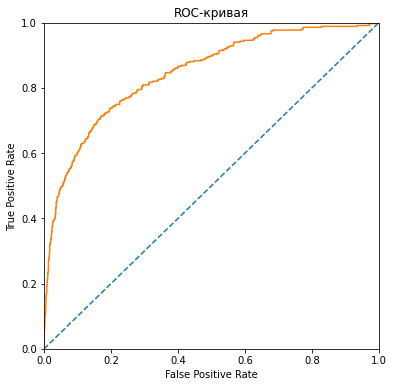

In [53]:
model = RandomForestClassifier(max_depth = 9,n_estimators = 10,random_state=12345,class_weight = 'balanced')
model.fit(features_train,target_train)
predictions_test = model.predict(features_test)
f1_test = f1_score(target_test, predictions_test)
result_test = accuracy_score(predictions_test,target_test)


print('Accuracy лучшей модели на тестовой выборке:',result_test) 
print('f1 тестовой',f1_score(target_test,predictions_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test,probabilities_one_test)

print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_test,probabilities_one_test)# < напишите код здесь >


plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

## Общий вывод

При создании модели для данных с дисбалансом,наилучшая модель-"Случайный лес" ,способ устранения дисбаланса -"Метод взвешивания классов".
Accuracy лучшей модели на тестовой выборке: 0.8306761957119296
f1 тестовой 0.5936675461741425
AUC-ROC тестовой -0.8690573706367336
